In [10]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt
from baselines import *

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# set plot design features
font = {'family'   : 'sans-serif',
        'sans-serif' : 'Helvetica',
        'weight'   : 'regular',
        'size'     : 24}

mpl.rc('font', **font)

colors = np.array([[95,59,151],[85,180,103],[250,186,63],[150,150,150]])/255

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Moment Conversion

Text(0.5, 1.0, 'true')

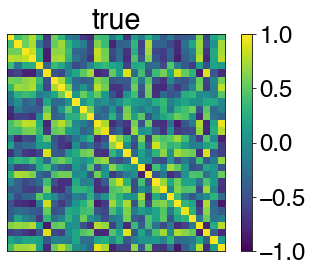

In [4]:
moment_conversion = np.load("../data/simulations/fig2-moment-conversion.npz",allow_pickle=True)
plt.imshow(moment_conversion["sig_true"],vmin=-1,vmax=1)
plt.colorbar()
plt.tick_params(
    axis='both',       # changes apply to the x and y axes
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False, # labels along the bottom edge are off
    left=False,
    labelleft=False)

plt.title('true')

#plt.savefig("saved_images/fig2a_true.pdf",transparent=True)

### Hankel Parameter

In [ ]:
sses = np.load("../data/simulations/fig2-singvals.pkl",allow_pickle=True)
sses_array = np.zeros((4,30))
for i in range(4):
    for j in range(30):
        sses_array[i,j] = sses[i][j]

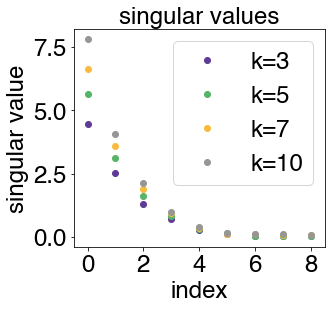

In [20]:
plt.figure(figsize=(4.5,4))
k = [3,5,7,10]
for i in range(4):
    plt.plot(sses_array[i].T,'.',color=colors[i],label="k=%s" %k[i],markersize=12)
plt.xlim([-0.5,8.5])
plt.xticks(np.arange(0,8.1,2))
plt.ylabel('singular value')
plt.xlabel('index')
plt.title('singular values',fontsize=24)
plt.legend()
plt.savefig("saved_images/fig2b.pdf",transparent=True)

### System Parameter Errors

In [2]:
Ns = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000]
logN = np.log10(Ns)
error_metrics = np.load("../data/simulations/datasetB-error_metrics.npz",allow_pickle=True)

#### Error in A

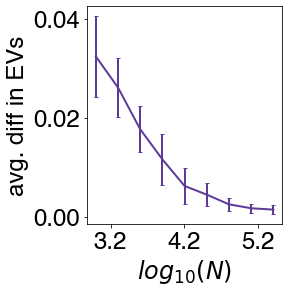

In [3]:
plt.figure(figsize=(3.5,4))

A_error = np.squeeze(np.mean(error_metrics["Aangles"],axis=1))
A_std = np.squeeze(np.std(error_metrics["Aangles"],axis=1))

plt.errorbar(logN,A_error,yerr=A_std, color=colors[0],capsize=2,linewidth=2)
plt.xlabel('$log_{10}(N)$')
plt.xticks(np.arange(3.2,5.6,1))
plt.ylabel('avg. diff in EVs')
#plt.yticks(np.arange(0,0.016,0.005))
#plt.title('dynamics matrix', fontsize=24)
plt.savefig("saved_images/fig2f.pdf",transparent=True)

#### Error in C

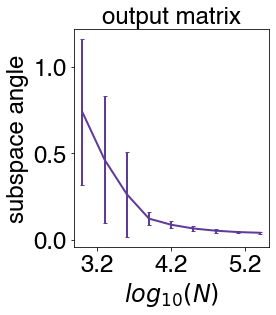

In [7]:
plt.figure(figsize=(3.5,4))

C_error = np.squeeze(np.mean(error_metrics["Cangles"],axis=1))
C_std = np.squeeze(np.std(error_metrics["Cangles"],axis=1))

plt.errorbar(logN,C_error,yerr=C_std, color=colors[0],capsize=2,linewidth=2)
plt.xlabel('$log_{10}(N)$')
plt.xticks(np.arange(3.2,5.6,1))
plt.ylabel('subspace angle')
plt.title('output matrix', fontsize=24)
plt.savefig("saved_images/fig2g.pdf",transparent=True)

#### Error in D

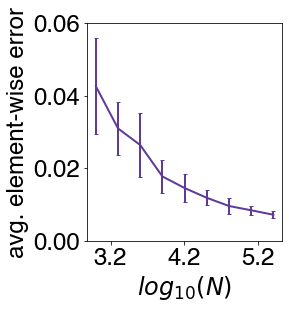

In [13]:
plt.figure(figsize=(3.5,4))

D_error = np.squeeze(np.mean(error_metrics["Dangles"],axis=1))
D_std = np.squeeze(np.std(error_metrics["Dangles"],axis=1))

plt.errorbar(logN,D_error ,yerr=D_std , color=colors[0],capsize=2,linewidth=2)
plt.xlabel('$log_{10}(N)$')
plt.xticks(np.arange(3.2,5.6,1))
plt.ylabel('avg. element-wise error')
plt.yticks(np.arange(0,0.061,0.02))
plt.title('direct feedthrough matrix $D$', fontsize=24)
plt.savefig("saved_images/fig2h.pdf",transparent=True)

#### Error in Gain

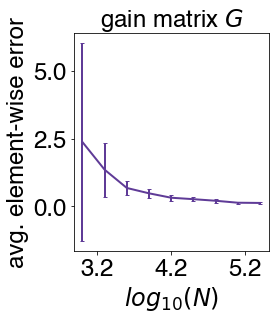

In [15]:
plt.figure(figsize=(3.5,4))

G_error = np.squeeze(np.mean(error_metrics["Gangles"],axis=1))
G_std = np.squeeze(np.std(error_metrics["Gangles"],axis=1))

plt.errorbar(logN,G_error,yerr=G_std, color=colors[0],capsize=2,linewidth=2)
plt.xlabel('$log_{10}(N)$')
plt.xticks(np.arange(3.2,5.6,1))
plt.ylabel('avg. element-wise error')
#plt.yticks(np.arange(0.6,1.9,0.4))
plt.title('gain matrix $G$', fontsize=24)
plt.savefig("saved_images/fig2i.pdf",transparent=True)

#### Baseline comparisons

In [9]:
simulated_dataset = np.load('../data/simulations/datasetB_large.npz', allow_pickle=True)
y_trains = simulated_dataset['y_train']
y_tests = simulated_dataset['y_test']
u_trains = simulated_dataset['u_train']
u_tests = simulated_dataset['u_test']

In [47]:
y_tests[0][0:100,:]

array([[1., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1.],
       [0., 1., 1., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0., 1., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 1., 1., 0., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0., 0., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 1., 0.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 0., 0., 1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 1., 1., 1., 1., 0.],
       [1., 0., 0., 

In [31]:
percent_match_glm, y_glm, y_test_vectorized, phi = glm_prediction_accuracy(y_trains, u_trains, y_tests, u_tests)

/usr/people/istone/.conda/envs/fuck/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/usr/people/istone/.conda/envs/fuck/lib/python3.7/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/usr/people/istone/.conda/envs/fuck/lib/python3.7/site-packages/autograd/numpy/numpy_vjps.py:34: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.multiply,    lambda ans, x, y : unbroadcast_f(x, lambda g: y * g),


In [41]:
y_glm[0:50]

array([0, 0, 0, 0, 8, 8, 5, 7, 2, 5, 9, 7, 9, 5, 2, 5, 6, 0, 0, 6, 7, 9,
       0, 6, 6, 5, 9, 6, 9, 0, 6, 2, 6, 9, 8, 6, 5, 5, 9, 9, 0, 0, 3, 6,
       6, 2, 6, 0, 2, 8])

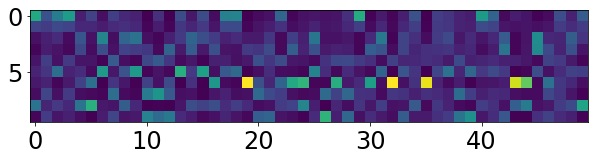

In [43]:
plt.figure(figsize=(10,10))
im = plt.imshow(phi[0:50,:].T)

#### Latent Recovery

In [17]:
data = np.load('../data/simulations/datasetB-resimulated.npz',allow_pickle=True)
z_true = data["z"]
z_sim = data["z_sim"]

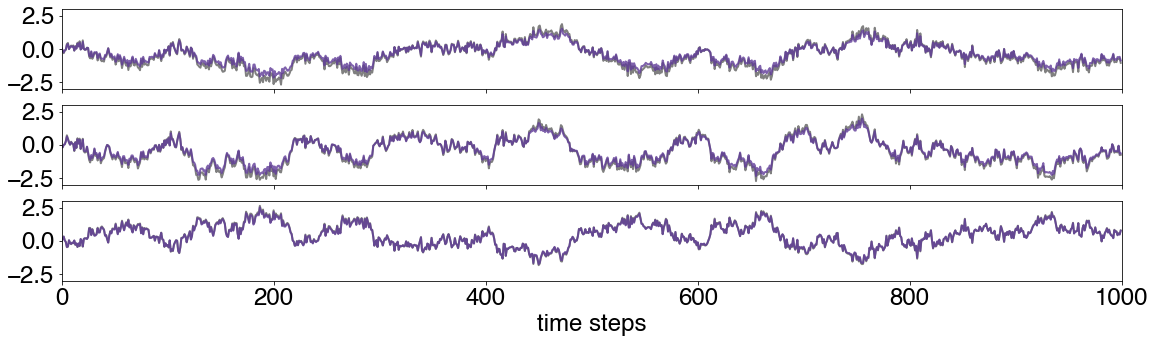

In [19]:
fig, axs = plt.subplots(3,1,sharex=True)
fig.set_size_inches(19, 5)
count = 0
for i in [3,4,9]:    
    axs[count].plot(z_true[0:1000,i],'gray', linewidth=2,label='true')
    axs[count].plot(z_sim[0:1000,i],color=colors[0], linewidth=2,alpha=0.8,label='best-LDS')
    axs[count].set_ylim([-3,3])
    axs[count].set_xlim([0,1000])
    count += 1
axs[2].set_xlabel('time steps')
plt.savefig("saved_images/fig2j.pdf",transparent=True)